## 9. Forecasting

**Exercise 9.1**. For an AR(1) model with $Y_t = 12.2$, $\phi = −0.5$, and $\mu = 10.8$,

**(a)** Find $\hat{Y}_t(1)$.

**(b)** Calculate $\hat{Y}_t(2)$ in two different ways.

**(c)** Calculate $\hat{Y}_t(10)$.

**Solution**.

**(a)**  $$\hat{Y}_t(1) = \mu + \phi (Y_t - \mu) = 10.09 $$

**(b)**  Calculating the estimate from the previous estimate,

$$ \hat{Y}_t(2) = \mu + \phi (\hat{Y}_t(1) - \mu) = 11.155 $$

Alternatively, calculating it directly,

$$ \hat{Y}_t(2) = \mu + \phi^2 (Y_t - \mu) = 11.155 $$

**(c)**  Calculating it directly,

$$ \hat{Y}_t(10) = \mu + \phi^{10} (Y_t - \mu) \approx 10.801367 \approx \mu $$

**Exercise 9.2**.  Suppose that annual sales (in millions of dollars) of the Acme Corporation follow the AR(2) model $Y_t = 5  + 1.1 Y_{t-1} - 0.5 Y_{t-2} + e_t$ with $\sigma_e^2 = 2$.

**(a)** If sales for 2005, 2006, and 2007 were \\$9 million, \\$11 million, and \\$10 million, respectively, forecast sales for 2008 and 2009.

**(b)** Show that $\psi_1 = 1.1$ for this model.

**(c)** Calculate 95% prediction limits for your forecast in part (a) for 2008.

**(d)** If sales in 2008 turn out to be \\$12 million, update your forecast for 2009.

**Solution**.

**(a)**  Forecasts are:

$$ \hat{Y}_{2008} = 5 + 1.1 Y_{2007} - 0.5 Y_{2006} = 10.5 $$

and

$$ \hat{Y}_{2009} = 5 + 1.1 \hat{Y}_{2008} - 0.5 Y_{2007} = 11.55 $$

**(b)**  From Equation (4.3.21) for the AR(2) model, $\psi_1 - \phi_1 \psi_0 = 0$ and $\psi_0 = 1$.  For this model, $\phi_1 = 1.1$, so $\psi_1 = 1.1$.

**(c)**   We have:

$$ \text{Var}[e_t(\ell)] = \sigma_e^2 \sum_{j=0}^{\ell-1} \psi_j^2 $$

so, in particular, $\text{Var}[e_t(1)] = \sigma_e^2 = 2$ for the one-lag prediction of 2008.  The prediction bounds are $\pm z_{\alpha / 2} \sigma_e = \pm \Phi(0.975) \sqrt{2} \approx 2.7718$, so a 95% confidence interval would be 

$$ (\hat{Y}_{2008} - z_{\alpha / 2} \sigma_e, \hat{Y}_{2008} - z_{\alpha / 2} \sigma_e ) \approx (7.7282, 13.2718) $$

**(d)**  We can update the forecast according to Equation (9.6.1),

$$ \hat{Y}_{t+1}(\ell) = \hat{Y}_{t}(\ell + 1) + \psi_\ell [Y_{t+1} - \hat{Y}_t(1)] $$

In our case,

$$ \hat{Y}_{2008}(1) = \hat{Y}_{2007}(2) + \psi_1 [Y_{2008} - \hat{Y}_{2007}(1)] = 11.55 + 1.1 \cdot [12 - 10.5] = 13.2 $$

**Exercise 9.3**.  Using the estimated cosine trend on page 192:

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for April 1976.

**(b)** Find a 95% prediction interval for that April forecast. (The estimate of $\sqrt{\gamma_0}$ for this model is 3.719°F.)

**(c)** What is the forecast for April, 1977? For April 2009?

**Solution**.  The cosine trend is given as

$$ \hat{\mu}_t = 46.2660 + (-26.7079) \cos (2 \pi t) + (-2.1697) \sin (2 \pi t) $$

where time $t$ is measured in years, with $t = 0$ for January 1964, frequency $f = 1$ per year, and the final observed value is for December 1975.

**(a)**  There are 12 years and 3 months from Jan 1964 until Apr 1976; so we can use $t = 12 + 3/12$.

In [1]:
mu_t <- function(t) {
    46.2660 + (-26.7079) * cos(2 * pi * t) + (-2.1697) * sin(2 * pi * t)
}

farenheit_to_celsius <- function(t_f) {
    (t_f - 32) * 5 / 9
}

temperature_to_string <- function(t_f) {
    paste(c(round(t_f, 1), '°F or ', round(farenheit_to_celsius(t_f), 1), '°C'), collapse='')
}

t = 12 + 3/12
estimate = mu_t(t)
print(temperature_to_string(estimate))

[1] "44.1°F or 6.7°C"


The forecast is 44.1°F or 6.7°C. 

**(b)**  The 95% prediction limits are $\hat{\mu}_t \pm z_{\alpha/2} \sqrt{\gamma_0} $

In [2]:
z = qnorm(0.975)
se = 3.719

estimate = mu_t(t)
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print(c('Lower estimate: ', temperature_to_string(lower_estimate)), quote=F)
print(c('Upper estimate: ', temperature_to_string(upper_estimate)), quote=F)

[1] Lower estimate:  36.8°F or 2.7°C 
[1] Upper estimate:  51.4°F or 10.8°C


The 95\% confidence interval is from 36.8°F to 51.4°F, or 2.7°C to 10.8°C.

**(c)**  All forecasts for April are the same, 44.1°F or 6.7°C.

**Exercise 9.4**.  Using the estimated cosine trend on page 192:

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for May 1976.

**(b)** Find a 95% prediction interval for that May 1976 forecast. (The estimate of for this model is 3.719°F.)

**Solution**.

**(a)**

In [3]:
t = 12 + 4/12
estimate = mu_t(t)
print(temperature_to_string(estimate))

[1] "57.7°F or 14.3°C"


The forecast temperature is 57.7°F or 14.3°C.

**(b)**

In [4]:
estimate = mu_t(t)
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print(c('Lower estimate: ', temperature_to_string(lower_estimate)), quote=F)
print(c('Upper estimate: ', temperature_to_string(upper_estimate)), quote=F)

[1] Lower estimate:  50.5°F or 10.3°C
[1] Upper estimate:  65°F or 18.4°C  


The 95\% confidence interval is from 50.5°F to 65.5°F, or 10.3°C to 18.4°C.

**Exercise 9.5**.  Using the seasonal means model without an intercept shown in Exhibit 3.3 on page 32:

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for April, 1976.

**(b)** Find a 95% prediction interval for that April forecast. (The estimate of $\sqrt{\gamma_0}$ for this model is 3.419°F.)

**(c)** Compare your forecast with the one obtained in Exercise 9.3.

**(d)** What is the forecast for April 1977? April 2009?

**Solution**.  The model is:

$$
\begin{array}{lcccc}
 & \text{Estimate} & \text{Std. Error} & t\text{-value} & \text{Pr}[>|t|] \\
\hline
\text{January}   & 16.608 & 0.987 & 16.8 & < 0.0001 \\
\text{February}  & 20.650 & 0.987 & 20.9 & < 0.0001 \\
\text{March}     & 32.475 & 0.987 & 32.9 & < 0.0001 \\
\text{April}     & 46.525 & 0.987 & 47.1 & < 0.0001 \\
\text{May}       & 58.092 & 0.987 & 58.9 & < 0.0001 \\
\text{June}      & 67.500 & 0.987 & 68.4 & < 0.0001 \\
\text{July}      & 71.717 & 0.987 & 72.7 & < 0.0001 \\
\text{August}    & 69.333 & 0.987 & 70.2 & < 0.0001 \\
\text{September} & 61.025 & 0.987 & 61.8 & < 0.0001 \\
\text{October}   & 50.975 & 0.987 & 51.6 & < 0.0001 \\
\text{November}  & 36.650 & 0.987 & 37.1 & < 0.0001 \\
\text{December}  & 23.642 & 0.987 & 24.0 & < 0.0001
\end{array}
$$

**(a)**

In [5]:
temperature_to_string(46.525)

[1] "46.5°F or 8.1°C"

The estimate for April is just the coefficient for April, 46.5°F or 8.1°C.

**(b)**

In [6]:
z = qnorm(0.975)
se = 3.419

estimate = 46.525
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print(c('Lower estimate: ', temperature_to_string(lower_estimate)), quote=F)
print(c('Upper estimate: ', temperature_to_string(upper_estimate)), quote=F)

[1] Lower estimate:  39.8°F or 4.3°C 
[1] Upper estimate:  53.2°F or 11.8°C


The 95% prediction interval for the April forecast is 39.8°F to 53.2°F, or 4.3°C to 11.8°C.

**(c)**  This model predicts a slightly higher temperature, with a slightly smaller prediction interval.

**(d)** Forecast for all April months are the same: 46.5°F or 8.1°C.

**Exercise 9.6**.  Using the seasonal means model with an intercept shown in Exhibit 3.4 on page 33:

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for April 1976.

**(b)** Find a 95% prediction interval for that April forecast. (The estimate of $\sqrt{\gamma_0}$ for this model is 3.419°F.)

**(c)** Compare your forecast with the one obtained in Exercise 9.5.

**Solution**.  The model is:

$$
\begin{array}{lcccc}
 & \text{Estimate} & \text{Std. Error} & t\text{-value} & \text{Pr}[>|t|] \\
\hline
\text{Intercept} & 16.608 & 0.987 & 16.83 & < 0.0001 \\
\text{February}  &  4.042 & 1.396 &  2.90 &  0.00443 \\
\text{March}     & 15.867 & 1.396 & 11.37 & < 0.0001 \\
\text{April}     & 29.917 & 1.396 & 21.43 & < 0.0001 \\
\text{May}       & 41.483 & 1.396 & 29.72 & < 0.0001 \\
\text{June}      & 50.892 & 1.396 & 36.46 & < 0.0001 \\
\text{July}      & 55.108 & 1.396 & 39.48 & < 0.0001 \\
\text{August}    & 52.725 & 1.396 & 37.78 & < 0.0001 \\
\text{September} & 44.417 & 1.396 & 31.82 & < 0.0001 \\
\text{October}   & 34.367 & 1.396 & 24.62 & < 0.0001 \\
\text{November}  & 20.042 & 1.396 & 14.36 & < 0.0001 \\
\text{December}  &  7.033 & 1.396 &  5.04 & < 0.0001
\end{array}
$$

**(a)**

In [7]:
temperature_to_string(16.608 + 29.917)

[1] "46.5°F or 8.1°C"

The estimate for April is 46.5°F or 8.1°C.

**(b)**

In [8]:
z = qnorm(0.975)
se = 3.419

estimate = 16.608 + 29.917
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print(c('Lower estimate: ', temperature_to_string(lower_estimate)), quote=F)
print(c('Upper estimate: ', temperature_to_string(upper_estimate)), quote=F)

[1] Lower estimate:  39.8°F or 4.3°C 
[1] Upper estimate:  53.2°F or 11.8°C


The 95% prediction interval for the April forecast is 39.8°F to 53.2°F, or 4.3°C to 11.8°C.

**(c)**  The forecasts between the two models are always identical.

**Exercise 9.7**.  Using the seasonal means model with an intercept shown in Exhibit 3.4 on page 33

**(a)** Forecast the average monthly temperature in Dubuque, Iowa, for January 1976.

**(b)** Find a 95% prediction interval for that January forecast. (The estimate of $\sqrt{\gamma_0}$ for this model is 3.419°F.)

**Solution**.

**(a)**

In [9]:
temperature_to_string(16.608)

[1] "16.6°F or -8.6°C"

The estimate for January is 16.6°F or -8.6°C.

**(b)**

In [10]:
z = qnorm(0.975)
se = 3.419

estimate = 16.608
lower_estimate = estimate - z * se
upper_estimate = estimate + z * se

print(c('Lower estimate: ', temperature_to_string(lower_estimate)), quote=F)
print(c('Upper estimate: ', temperature_to_string(upper_estimate)), quote=F)

[1] Lower estimate:  9.9°F or -12.3°C
[1] Upper estimate:  23.3°F or -4.8°C


The 95% prediction interval for the January forecast is 9.9°F to 23.3°F, or -12.3°C to -4.8°C.

**Exercise 9.8**.  Consider the monthly electricity generation time series shown in Exhibit 5.8 on page 99. The data are in the file named `electricity`.

**(a)** Fit a deterministic trend model containing seasonal means together with a linear time trend to the logarithms of the electricity values.

**(b)** Plot the last five years of the series together with two years of forecasts and the 95% forecast limits. Interpret the plot.

**Solution**.

In [11]:
require(zoo)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [12]:
data <- read.table("../data/electricity.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("1973-01"), freq = 12))
data['t'] = as.numeric(format(data[['date']], "%Y")) + as.numeric(format(data[['date']], "%m"))/12
data['month'] = as.factor(format(data[['date']], "%m"))

In [13]:
model = lm(log(electricity)~ t + month, data=data)
summary(model)


Call:
lm(formula = log(electricity) ~ t + month, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.096274 -0.029189  0.000315  0.025507  0.134976 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.783e+01  4.283e-01 -88.323  < 2e-16 ***
t            2.526e-02  2.153e-04 117.310  < 2e-16 ***
month02     -1.246e-01  1.004e-02 -12.408  < 2e-16 ***
month03     -9.080e-02  1.004e-02  -9.040  < 2e-16 ***
month04     -1.642e-01  1.004e-02 -16.344  < 2e-16 ***
month05     -1.000e-01  1.004e-02  -9.959  < 2e-16 ***
month06     -2.016e-02  1.004e-02  -2.007   0.0455 *  
month07      7.675e-02  1.004e-02   7.641 1.75e-13 ***
month08      7.368e-02  1.004e-02   7.335 1.33e-12 ***
month09     -6.473e-02  1.004e-02  -6.444 3.49e-10 ***
month10     -1.148e-01  1.005e-02 -11.431  < 2e-16 ***
month11     -1.346e-01  1.005e-02 -13.400  < 2e-16 ***
month12     -4.481e-02  1.005e-02  -4.460 1.08e-05 ***
---
Signif. codes:  0 '***' 0.001 '**'

**(b)**

In [14]:
sigma_e = summary(model)$sigma
z = qnorm(0.975)

In [15]:
require(ggplot2)
require(data.table)

Loading required package: ggplot2

Loading required package: data.table



In [16]:
t = time(zooreg(1:(2*12), as.yearmon("2006-01"), freq = 12))
new_data = data.table(
    'date' = t,
    't' = as.numeric(format(t, "%Y")) + as.numeric(format(t, "%m"))/12,
    'month' = as.factor(format(t, "%m"))
)
new_data[, 'electricity' := exp(predict.lm(model, new_data))]

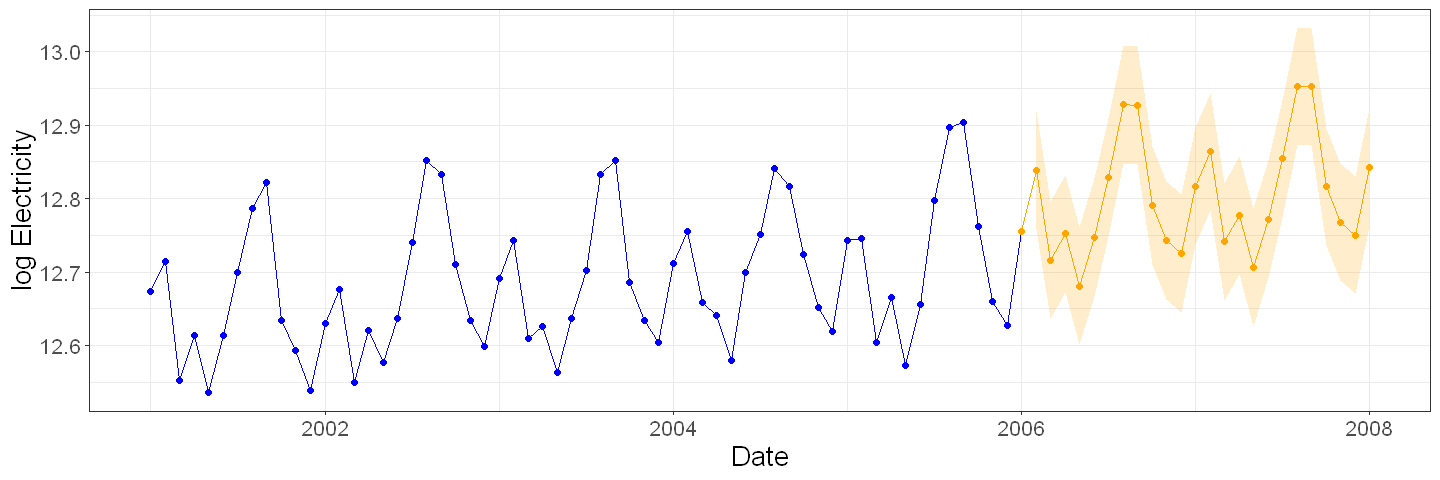

In [17]:
options(repr.plot.width=12, repr.plot.height=4)

index = data['t'] >= 2001

# Prepend last element so line is continuous
plot_data = rbind(last(data), new_data)

ggplot() + 
  geom_line(aes(x=data[['t']][index], y=log(data[['electricity']][index])), color='blue') +
  geom_point(aes(x=data[['t']][index], y=log(data[['electricity']][index])), color='blue') +
  geom_line(aes(x=plot_data[['t']], y=log(plot_data[['electricity']])), color='orange') +
  geom_point(aes(x=plot_data[['t']], y=log(plot_data[['electricity']])), color='orange') +
  geom_ribbon(aes(
      x=new_data[['t']], 
      ymin=log(new_data[['electricity']]) - z * sigma_e, 
      ymax=log(new_data[['electricity']]) + z * sigma_e
  ), fill='orange', alpha=0.2) + 
  xlab('Date') + ylab('log Electricity') +
  theme_bw() + theme(text = element_text(size=16))

The forecast seems to follow the seasonality and trend of the series well, with a tight confidence interval.

**Exercise 9.9**.  Simulate an AR(1) process with $\phi = 0.8$ and $\mu = 100$. Simulate 48 values but set aside the last 8 values to compare forecasts to actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of $\phi$ and $\mu$.

**(b)** Using the estimated model, forecast the next eight values of the series.  Plot the series together with the eight forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the eight forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and the same sample size.

**Solution**.

In [18]:
set.seed(2000)
Y = arima.sim(model=list(ar=0.8), n=48) + 100

**(a)**

In [19]:
model = arima(Y[1:40], order=c(1, 0, 0), method='ML')
print(model)


Call:
arima(x = Y[1:40], order = c(1, 0, 0), method = "ML")

Coefficients:
         ar1  intercept
      0.8433    99.7043
s.e.  0.0821     0.7337

sigma^2 estimated as 0.6705:  log likelihood = -49.38,  aic = 104.77


**(b)**

In [20]:
pred = predict(model, n.ahead=8, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

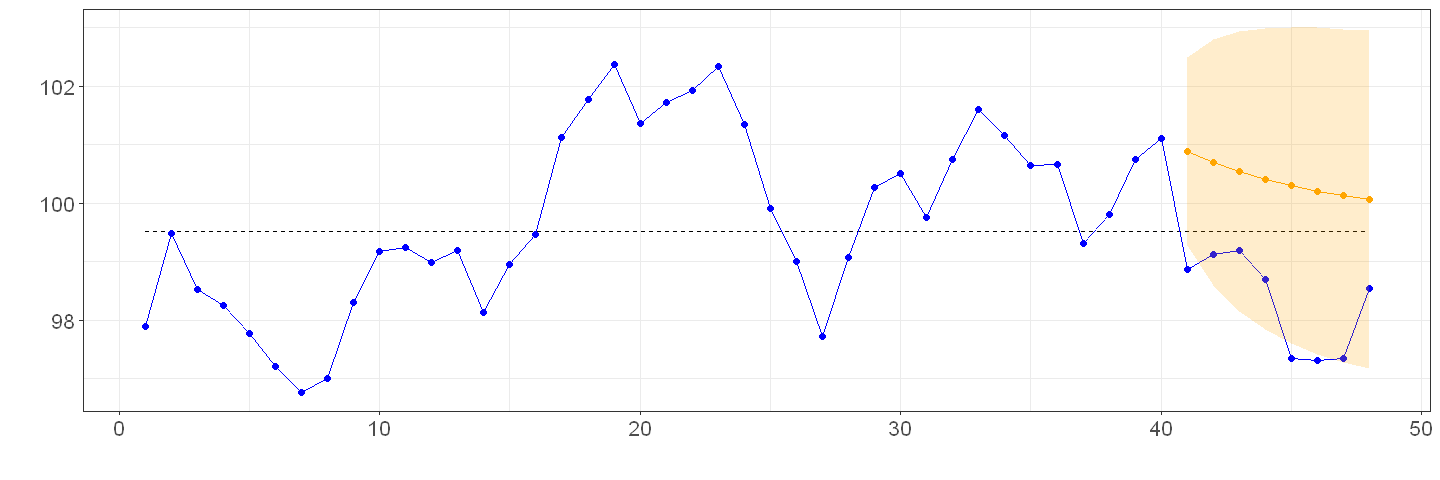

In [21]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)**  Most of the values are within the 95% confidence interval.

**(d)**  See (b).

**(e)**


Call:
arima(x = Y[1:40], order = c(1, 0, 0), method = "ML")

Coefficients:
         ar1  intercept
      0.7887    99.6842
s.e.  0.0946     0.7475

sigma^2 estimated as 1.153:  log likelihood = -60.09,  aic = 126.18


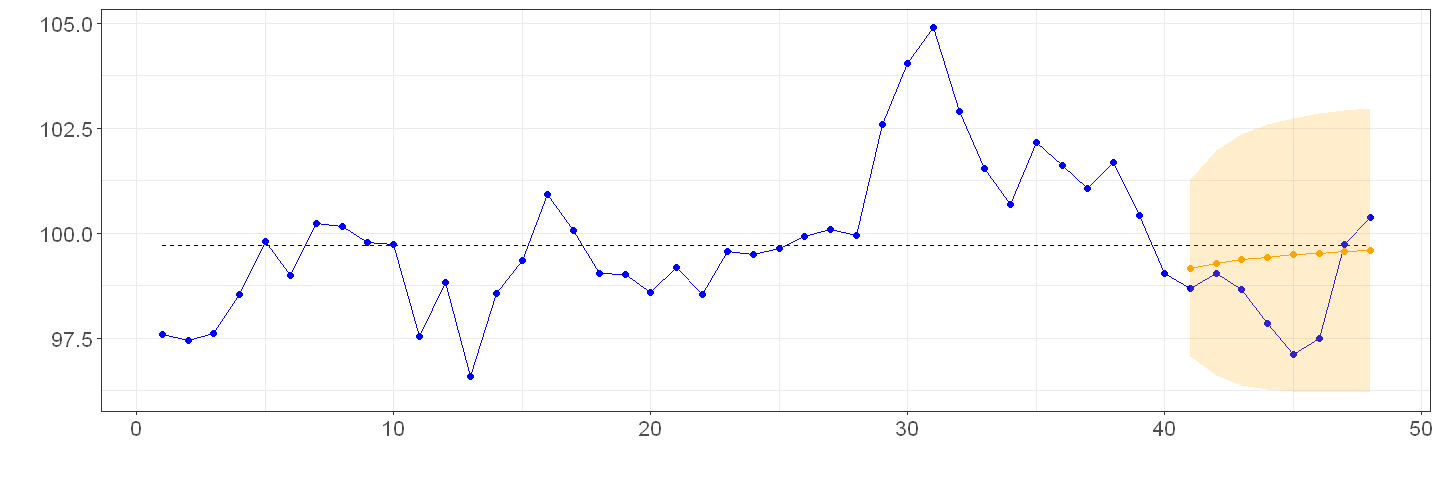

In [22]:
set.seed(3000)
Y = arima.sim(model=list(ar=0.8), n=48) + 100
model = arima(Y[1:40], order=c(1, 0, 0), method='ML')
print(model)

pred = predict(model, n.ahead=8, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

Results are again within the 95% confidence interval.

**Exercise 9.10**.  Simulate an AR(2) process with $\phi_1 = 1.5$, $\phi_2 = −0.75$, and $\mu = 100$.  Simulate 52 values but set aside the last 12 values to compare forecasts to actual values.

**(a)** Using the first 40 values of the series, find the values for the maximum likelihood estimates of the $\phi$'s and $\mu$.

**(b)** Using the estimated model, forecast the next 12 values of the series.  Plot the series together with the 12 forecasts. Place a horizontal line at the estimate of the process mean.

**(c)** Compare the 12 forecasts with the actual values that you set aside.

**(d)** Plot the forecasts together with 95% forecast limits. Do the actual values fall within the forecast limits?

**(e)** Repeat parts (a) through (d) with a new simulated series using the same values of the parameters and same sample size.

**Solution**.

In [23]:
set.seed(2000)
Y = arima.sim(model=list(ar=c(1.5, -0.75)), n=52) + 100

**(a)**

In [24]:
model = arima(Y[1:40], order=c(2, 0, 0), method='ML')
print(model)


Call:
arima(x = Y[1:40], order = c(2, 0, 0), method = "ML")

Coefficients:
         ar1      ar2  intercept
      1.5793  -0.8337    99.8318
s.e.  0.0796   0.0779     0.5009

sigma^2 estimated as 0.6325:  log likelihood = -49.46,  aic = 106.92


**(b)**

In [25]:
pred = predict(model, n.ahead=12, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

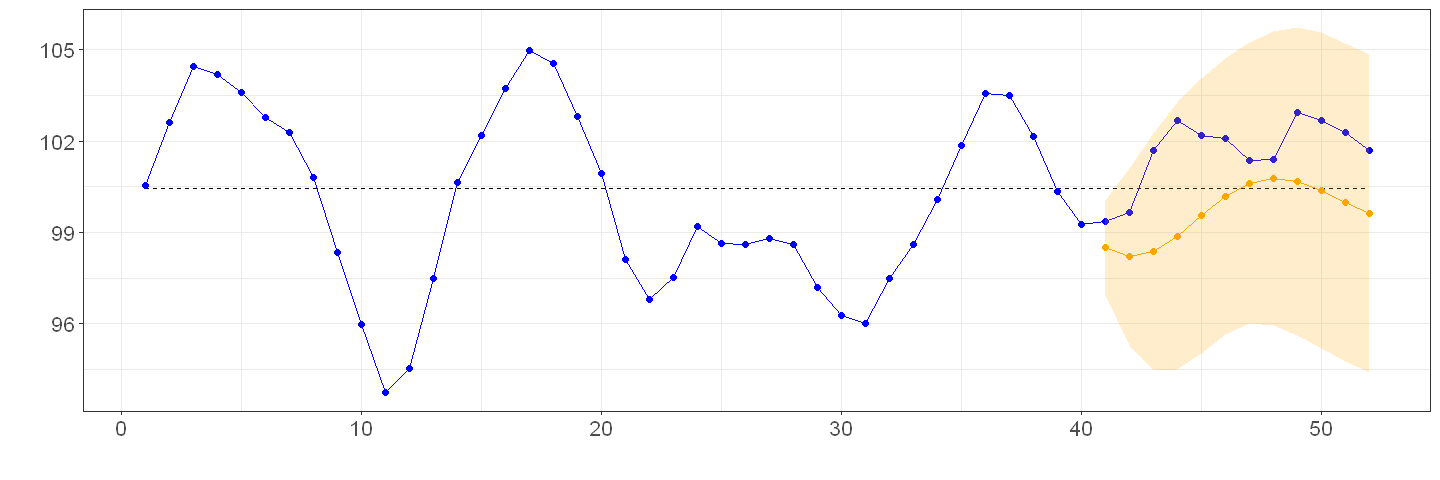

In [26]:
options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**(c)**  The actual values all fall within the confidence interval.

**(d)**  See (b).

**(e)**


Call:
arima(x = Y[1:40], order = c(2, 0, 0), method = "ML")

Coefficients:
         ar1      ar2  intercept
      1.6788  -0.8754    99.8661
s.e.  0.0728   0.0712     0.7727

sigma^2 estimated as 0.8956:  log likelihood = -56.81,  aic = 121.63


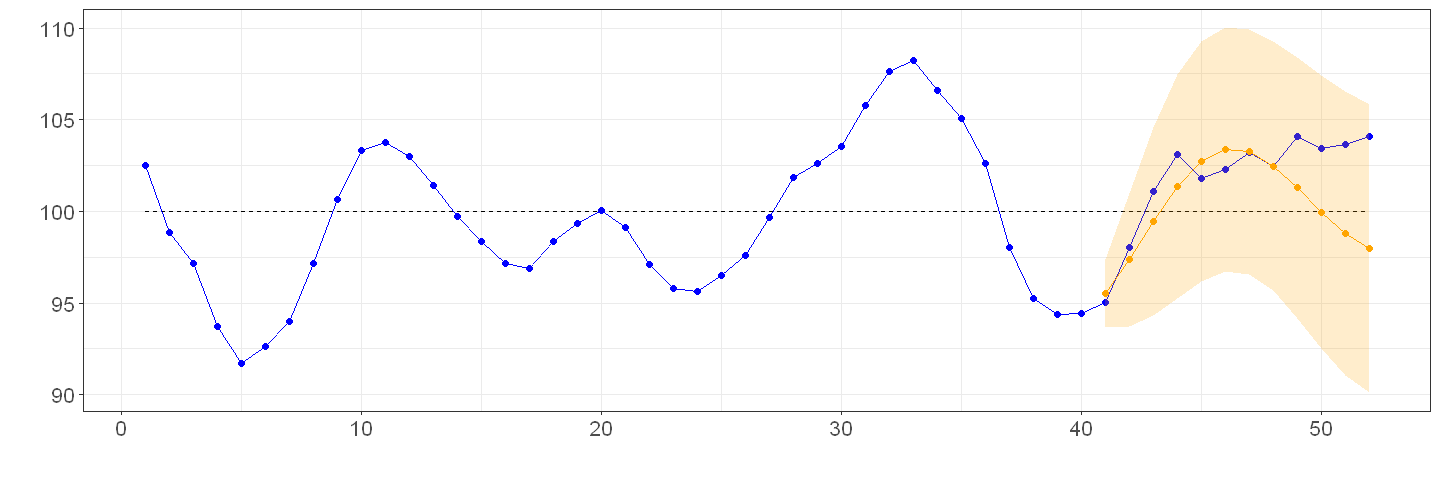

In [27]:
set.seed(2001)
Y = arima.sim(model=list(ar=c(1.5, -0.75)), n=52) + 100

model = arima(Y[1:40], order=c(2, 0, 0), method='ML')
print(model)

pred = predict(model, n.ahead=12, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = model$nobs
n = length(Y)
ggplot() + 
  geom_line(aes(x=1:n, y=mean(Y)), linetype='dashed') +
  geom_line(aes(x=1:n, y=c(Y)), color='blue') +
  geom_point(aes(x=1:n, y=c(Y)), color='blue') +
  geom_line(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_point(aes(x=(m+1):n, y=Y_pred), color='orange') +
  geom_ribbon(aes(
      x=(m+1):n, 
      ymin=Y_pred - z * se, 
      ymax=Y_pred + z * se
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

The actual values again fall within the confidence interval.